In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import glob

## Expresiones faciales en lenguaje de señas

Este dataset contiene datos correspondientes a 8 tipos de gestos faciales que se usan en algunas expresiones del lenguaje de señas brasileño. Se tienen por lo menos 660 ejemplos de cada tipo de expresión facial, provenientes de videos tomados de dos personas distintas, cada una de ellas haciendo un monólogo en lenguaje de señas que incluía dicha expresión.

Cada instancia consiste de las coordenadas (en tres dimensiones) de 100 puntos de interés del rostro del hablante, para un total de 300 datos por instancia. 

In [2]:
datapoints = np.sort(glob.glob('Dataset/*datapoints.txt')) # Cada archivo contiene todos las instancias de una misma categoría
positive = np.sort(glob.glob('Dataset/*targets.txt')) # Indica si la instancia corresponde al gesto esperado o es sólo un gesto neutro
target = []
datos = []
K = 8

for i in range(len(positive)):
    gesto = np.loadtxt(positive[i])
    categoria = np.loadtxt(datapoints[i],skiprows=1)[np.where(gesto==1)] #Coge sólo las instancias donde hay gesto
    categoria = categoria[:330] # Corta la cantidad de instancias, para que todas las categorías estén igualmente representadas
    for j in range(len(categoria)):
        dato = categoria[j]
        datos.append(dato[1:]) # Descarta el primer dato (no es relevante)
        target.append(i%K)
datos = np.array(datos,dtype=float)

In [3]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(datos, target, test_size=0.5)

scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
it = 2500
mlp = sklearn.neural_network.MLPClassifier(activation='logistic',hidden_layer_sizes=((4,4,4)),max_iter=it)

long = len(Y_train)
numDatos = []
f1_train = []
f1_test = []

for i in range(1,11):
    n_i = int(long/10*i)
    x_train = X_train[:n_i,:]
    y_train = Y_train[:n_i]
    x_test = X_test[:n_i,:]
    y_test = Y_test[:n_i]
    numDatos.append(n_i)
    
    mlp.fit(x_train, y_train)
    f1_train.append(metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))
    f1_test.append(metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization h

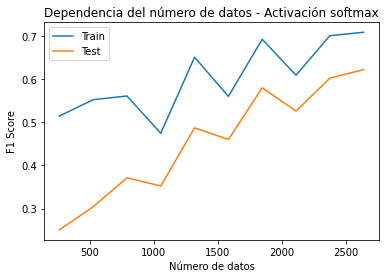

In [5]:
plt.figure()
plt.plot(numDatos,f1_train,label='Train')
plt.plot(numDatos,f1_test,label='Test')
plt.xlabel('Número de datos')
plt.ylabel('F1 Score')
plt.title('Dependencia del número de datos - Activación softmax')
plt.legend()

In [6]:
mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=((4,4,4)),max_iter=it)

long = len(Y_train)
numDatos = []
f1_train = []
f1_test = []

for i in range(1,11):
    n_i = int(long/10*i)
    x_train = X_train[:n_i,:]
    y_train = Y_train[:n_i]
    x_test = X_test[:n_i,:]
    y_test = Y_test[:n_i]
    numDatos.append(n_i)
    
    mlp.fit(x_train, y_train)
    f1_train.append(metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))
    f1_test.append(metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

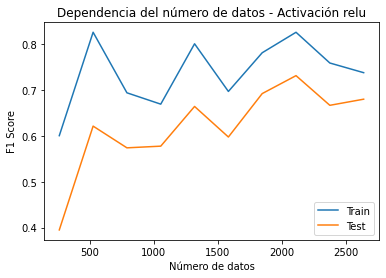

In [7]:
plt.figure()
plt.plot(numDatos,f1_train,label='Train')
plt.plot(numDatos,f1_test,label='Test')
plt.xlabel('Número de datos')
plt.ylabel('F1 Score')
plt.title('Dependencia del número de datos - Activación relu')
plt.legend()

In [8]:
alphas = np.logspace(-7,3,11)
f1_train = []
f1_test = []

for i in alphas:
    mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=((4,4,4)),max_iter=it,alpha=i)
    
    mlp.fit(X_train, Y_train)
    f1_train.append(metrics.f1_score(Y_train, mlp.predict(X_train), average='macro'))
    f1_test.append(metrics.f1_score(Y_test, mlp.predict(X_test), average='macro'))

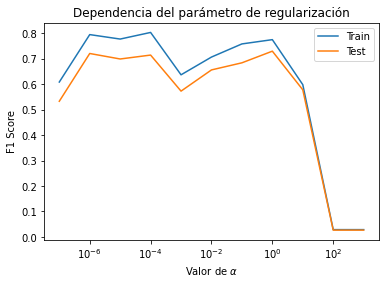

In [9]:
plt.figure()
plt.plot(alphas,f1_train,label='Train')
plt.plot(alphas,f1_test,label='Test')
plt.xlabel(r'Valor de $\alpha$')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.title('Dependencia del parámetro de regularización')
plt.legend()

## Discusión

En las gráficas de dependencia del número de datos se observan dos patrones importantes. En primer lugar, para ambas funciones de activación hay una tendencia clara de mejoría en el valor de F1 a medida que incrementa el número de datos (tanto para train como para test), tal como se esperaría - pues entre mayor sea el número de datos de entrenamiento mejor debería ser el modelo. Por otro lado, se puede ver que a medida que incrementa el número de datos la diferencia entre el F1 del train y el F1 del test disminuye, es decir, el train tiende a tener scores más altos que el test, pero esta brecha se va cerrando a medida que incrementa el número de datos. Esto se puede atribuir a que los modelos entrenados con menos datos tienen una mayor tendencia a hacer ovefitting, incrementando el score F1 del train sin mejorar realmente el modelo.

De igual manera, en la gráfica que presenta la dependencia sobre el valor de $\alpha$, se puede observar una característica muy clara. Cuando $\alpha$ toma valores mayores a 1 el score del modelo cae súbitamente hasta un valor cercano a 0. Esto se debe a que esos valores tan altos de alpha "sobre-restringen" el vector de coeficientes de cada capa de la red.